#### Implementation of EDA on Zomato dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'Country-Code.xlsx',
 'EDA.ipynb',
 'file1.json',
 'file2.json',
 'file3.json',
 'file4.json',
 'file5.json',
 'Untitled.ipynb',
 'zomato.csv',
 'Zomatodataset.zip']

In [27]:
"""
>  we are having multiple json files dataset containg zomato data
> lets convert all those files into one csv file
"""

df=pd.read_json("file1.json")
# df["restaurants"][0]
df

,results_found,restaurants,results_shown,results_start,message,code,status
0,17151.0,"[{'restaurant': {'has_online_delivery': 1, 'ph...",20.0,1.0,NaN,NaN,NaN
1,4748.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
2,13786.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
3,10224.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
4,7039.0,"[{'restaurant': {'has_online_delivery': 0, 'ph...",20.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
474,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
475,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
476,NaN,NaN,NaN,NaN,API limit exceeded,440.0,
477,NaN,NaN,NaN,NaN,API limit exceeded,440.0,


In [363]:
#### the restaurant json file will be looking like this

restaurant_dic = pd.DataFrame(df["restaurants"][0]).loc[0]["restaurant"]
restaurant_dic

{'has_online_delivery': 1,
 'photos_url': 'https://www.zomato.com/HauzKhasSocial/photos?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1#tabtop',
 'url': 'https://www.zomato.com/HauzKhasSocial?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
 'price_range': 3,
 'apikey': 'b90e6a8c738410315a20c449fe2eb1b1',
 'user_rating': {'rating_text': 'Very Good',
  'rating_color': '5BA829',
  'votes': '7931',
  'aggregate_rating': '4.3'},
 'R': {'res_id': 308322,
  'name': 'Hauz Khas Social',
  'cuisines': 'Continental, American, Asian, North Indian',
  'is_delivering_now': 0,
  'average_cost_for_two': 1600,
  'switch_to_order_menu': 0,
  'offers': [],
  'has_table_booking': 1},
 'name': 'Hauz Khas Social',
 'cuisines': 'Continental, American, Asian, North Indian',
 'is_delivering_now': 0,
 'deeplink': 'zomato://restaurant/308322',
 'menu_url': 'https://www.zomato.com/HauzKhasSocial/menu?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1&openSwipeBox=menu&showMinimal=1

In [364]:
os.listdir()

['.ipynb_checkpoints',
 'Country-Code.xlsx',
 'EDA.ipynb',
 'file1.json',
 'file2.json',
 'file3.json',
 'file4.json',
 'file5.json',
 'Untitled.ipynb',
 'zomato.csv',
 'Zomatodataset.zip']

In [365]:
list_of_zomato_datasets = []
for dataset in os.listdir():
    if dataset.startswith("file"):
        list_of_zomato_datasets.append(dataset)
print(list_of_zomato_datasets)


for dataset in list_of_zomato_datasets:
    df = pd.read_json(dataset)
    

['file1.json', 'file2.json', 'file3.json', 'file4.json', 'file5.json']


In [372]:
zomato_dataset = pd.DataFrame()

### we are iterating through all the seperate zomato datasets and merging them into one single file 
for dataset in list_of_zomato_datasets:
    print(dataset)
    df = pd.read_json(dataset)
    no_of_record = list(df["restaurants"].index)
    for recd_no in no_of_record:

        ### here we are checking whether the restaurant column's record is having data or null and we know the nan will be float type 
        ### while checking if it is not null then we get array of boolean values as restaurant column record is containing dictionaries 

        recd_check = pd.isnull(df["restaurants"][recd_no])
        if type(df["restaurants"][recd_no])== float and type(recd_check)== bool:
            if pd.isnull(df["restaurants"][recd_no]) == True:
                pass
        else:
            list_of_restaurants_dic = df["restaurants"][recd_no]
            restuarant_indexes = len(list_of_restaurants_dic)
            for rest_index in range(restuarant_indexes):
                restaurant_dic = list_of_restaurants_dic[rest_index]["restaurant"]
                dict_keys = restaurant_dic.keys()
                zomdic ={}   
                for key in dict_keys:
                    if type(restaurant_dic[key]) == dict:

                        ### for each iteration, we are taking an empty dictionary and adding key-value using update function
                        zomdic.update(restaurant_dic[key])

                        ### here we are not taking the dictionary keys which containing hyperlinks and skipping some unnecessary keys

                    elif type(restaurant_dic[key])==str and "://" in restaurant_dic[key]:
                        pass
                    elif key in ["apikey","establishment_types","zomato_events","id"]:
                        pass
                    else :
                        zomdic[key] = restaurant_dic[key]  ## after completion of one iteration, we get complete details of one restaurant

                #### we converting that dictionary into dataframe and then concatinating it with the final zomato data set
                zomato_dataset = pd.concat([zomato_dataset,pd.DataFrame([zomdic])]) 
    zomato_dataset

file1.json
file2.json
file3.json
file4.json
file5.json


In [373]:
zomato_dataset.shape

(29753, 27)

In [374]:
zomato_dataset

,has_online_delivery,price_range,rating_text,rating_color,votes,aggregate_rating,res_id,name,cuisines,is_delivering_now,...,country_id,locality_verbose,city_id,zipcode,longitude,locality,currency,featured_image,thumb,order_deeplink
0,1,3,Very Good,5BA829,7931,4.3,308322,Hauz Khas Social,"Continental, American, Asian, North Indian",0,...,1,"Hauz Khas Village, New Delhi",1,,77.1944706000,Hauz Khas Village,Rs.,NaN,NaN,NaN
0,0,3,Excellent,3F7E00,778,4.5,18037817,Qubitos - The Terrace Cafe,"Thai, European, Mexican, North Indian, Chinese...",0,...,1,"Rajouri Garden, New Delhi",1,,77.1177015000,Rajouri Garden,Rs.,NaN,NaN,NaN
0,1,2,Very Good,5BA829,1537,4.4,312345,The Hudson Cafe,"Cafe, Italian, Continental, Chinese",0,...,1,"Delhi University-GTB Nagar, New Delhi",1,,77.2043172000,Delhi University-GTB Nagar,Rs.,NaN,NaN,NaN
0,0,3,Very Good,5BA829,1823,4.1,307490,Summer House Cafe,"Italian, Continental",0,...,1,"Hauz Khas, New Delhi",1,110016,77.2038090000,Hauz Khas,Rs.,NaN,NaN,NaN
0,0,3,Very Good,5BA829,840,4.4,18241537,38 Barracks,"North Indian, Italian, Asian, American",0,...,1,"Connaught Place, New Delhi",1,,77.2228584811,Connaught Place,Rs.,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,1,Good,9ACD32,108,3.6,17582627,Senor Iguanas,Mexican,0,...,216,"Pocatello, Pocatello",667,83201,-112.4433000000,Pocatello,$,,,NaN
0,0,3,Good,9ACD32,85,3.6,17582625,Sandpiper Restaurant & Lounge,"American, Seafood, Steak",0,...,216,"Pocatello, Pocatello",667,83201,-112.4320000000,Pocatello,$,,,NaN
0,0,3,Good,9ACD32,83,3.5,17582668,Texas Roadhouse,"American, BBQ, Steak",0,...,216,"Chubbuck, Pocatello",667,83202,-112.4613260000,Chubbuck,$,NaN,NaN,NaN
0,0,1,Good,9ACD32,91,3.6,17582498,Riverwalk Cafe,"Asian, Thai",0,...,216,"Lava Hot Springs, Pocatello",667,83246,-112.0132000000,Lava Hot Springs,$,,,NaN


# lets to analysis on the zomato dataset

In [28]:
df1 =pd.read_csv("zomato.csv",encoding="latin-1")
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [54]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [57]:
### we can check the dtype of the all the features like below
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [58]:
### we can get some statistical values 
### below we are only getting statistical info about only int type features

df1.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [63]:
### to get info about all the variables in the data

df1.describe(include="all")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,...,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551,9551,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,...,12,2,2,2,1,NaN,NaN,6,6,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Dilli Haat, INA, New Delhi",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,...,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,Orange,Average,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,...,8652,8393,7100,9517,9551,NaN,NaN,3737,3737,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,...,NaN,NaN,NaN,NaN,NaN,1.804837,2.666370,NaN,NaN,156.909748
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,...,NaN,NaN,NaN,NaN,NaN,0.905609,1.516378,NaN,NaN,430.169145
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,2.500000,NaN,NaN,5.000000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.200000,NaN,NaN,31.000000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,3.700000,NaN,NaN,131.000000


Data Analysis

>finding missing 

> finding outliers

> exploring numerical variables

> exploring categorical variables

> finding relationship b/w features

In [65]:
### to find missing values are present or not

df1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [67]:
### to get the name of the feature having null values

col_with_na = [features for features in df1.columns if df1[features].isnull().sum()>0]
col_with_na

['Cuisines']

<AxesSubplot:>

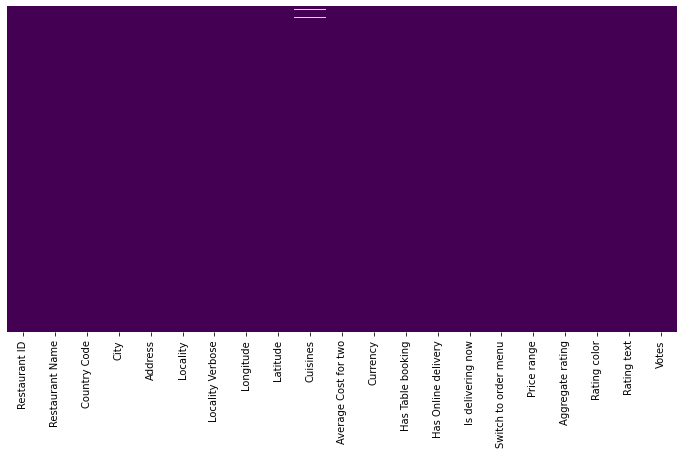

In [110]:
### to know missing values using heatmap
### here there are many records and nan values are less so we are not able to see here
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [73]:
df_countty = pd.read_excel("Country-Code.xlsx")
df_countty

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


#### our zomato dataset and df_country is also having country code so we can merge both of them 

In [76]:
### on is used for selecting the feature columns
### how is for selecting which type of join to be performed

Zomato_df = pd.merge(df1,df_countty,on = "Country Code",how = "left")
Zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [86]:
Zomato_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [79]:
country_names = Zomato_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [83]:
country_val = Zomato_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x1d877dfbbb0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

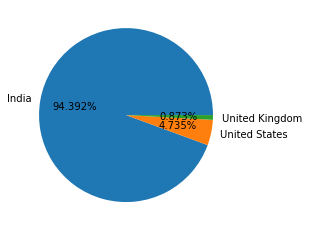

In [92]:
## pie char for top - 3countries that uses zomato

plt.pie(country_val[:3],labels = country_names[:3],autopct="%.3f%%")

#### observation :
from above we can say zomato's max transactions are from India and then USA , UK

In [94]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [100]:
df1.groupby(["Aggregate rating","Rating color","Rating text"]).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [105]:
ratings = df1.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns ={0:"Rating count"})
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


#### observation: 
1. whenever rating is b/w 4.5 to 4.9 ----> excellent
2.                 is b/w 4.0 to 4.4 ----> very good
3.                    b/w 3.5 to 3.9 ----> good
4.                    b/w 2.5 to 3.4 ----> average
5.                    b/w 2.0 to 2.4 ----> Poor

In [106]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

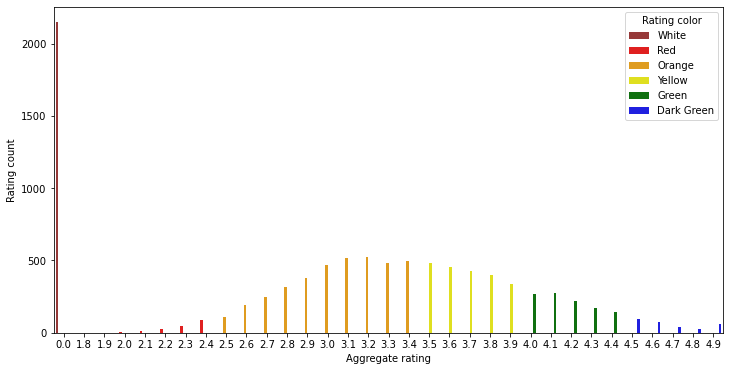

In [114]:
 ### we can increase the fig size using matplotlib 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,6)
sns.barplot(x = "Aggregate rating", y = "Rating count",hue="Rating color", data = ratings,palette = ["brown","red","orange","yellow","green","blue"])

#### observation :
1. not rated count is very high
2. max ratings are b/w 2.5 and 3.4

so, if we have any missing values in the rating we can replace them with value b/w 2.5 to 3.4

<AxesSubplot:xlabel='Rating color', ylabel='count'>

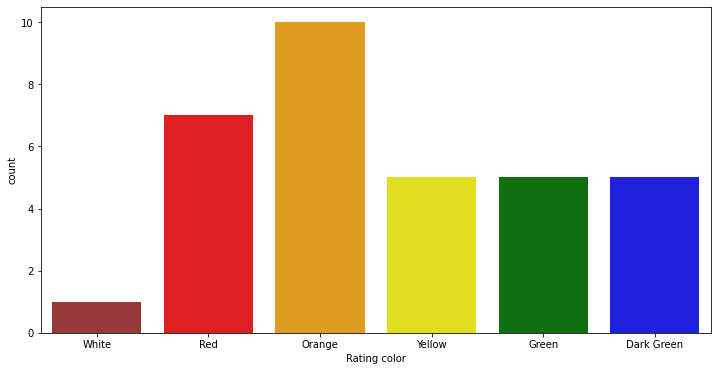

In [116]:
#count plot
# this count plot is not for the rating counts but it is for how frequent that particular color iis present int the records set
sns.countplot(x = "Rating color", data = ratings,palette = ["brown","red","orange","yellow","green","blue"])

#### lets find the country that has given 0 rating


In [133]:
Zomato_df[Zomato_df["Aggregate rating"]==0.0]["Country"].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

#### lets find out which currency is used by which country 


In [137]:
pd.DataFrame(Zomato_df.groupby(["Country","Currency"]).size())

,,0
Country,Currency,
Australia,Dollar($),24
Brazil,Brazilian Real(R$),60
Canada,Dollar($),4
India,Indian Rupees(Rs.),8652
Indonesia,Indonesian Rupiah(IDR),21
New Zealand,NewZealand($),40
Phillipines,Botswana Pula(P),22
Qatar,Qatari Rial(QR),20
Singapore,Dollar($),20


In [143]:
Zomato_df["Has Online delivery"].unique()

array(['No', 'Yes'], dtype=object)

#### which countries are having online delivery option

In [149]:
Zomato_df[Zomato_df["Has Online delivery"]=="Yes"]["Country"].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [153]:
Zomato_df.groupby(["Has Online delivery","Country"]).count()

Restaurant ID  Restaurant Name  \
Has Online delivery Country                                          
No                  Australia                  24               24   
                    Brazil                     60               60   
                    Canada                      4                4   
                    India                    6229             6229   
                    Indonesia                  21               21   
                    New Zealand                40               40   
                    Phillipines                22               22   
                    Qatar                      20               20   
                    Singapore                  20               20   
                    South Africa               60               60   
                    Sri Lanka                  20               20   
                    Turkey                     34               34   
                    UAE                        32               32   
                    United Kingdom             80               80   
                    United States             434              434   
Yes                 India                    2423             2423   
                    UAE                        28               28   

                                    Country Code  City  Address  Locality  \
Has Online delivery Country                                                 
No                  Australia                 24    24       24        24   
                    Brazil                    60    60       60        60   
                    Canada                     4     4        4         4   
                    India                   6229  6229     6229      6229   
                    Indonesia                 21    21       21        21   
                    New Zealand               40    40       40        40   
                    Phillipines               22    22       22        22   
                    Qatar                     20    20       20        20   
                    Singapore                 20    20       20        20   
                    South Africa              60    60       60        60   
                    Sri Lanka                 20    20       20        20   
                    Turkey                    34    34       34        34   
                    UAE                       32    32       32        32   
                    United Kingdom            80    80       80        80   
                    United States            434   434      434       434   
Yes                 India                   2423  2423     2423      2423   
                    UAE                       28    28       28        28   

                                    Locality Verbose  Longitude  Latitude  \
Has Online delivery Country                                                 
No                  Australia                     24         24        24   
                    Brazil                        60         60        60   
                    Canada                         4          4         4   
                    India                       6229       6229      6229   
                    Indonesia                     21         21        21   
                    New Zealand                   40         40        40   
                    Phillipines                   22         22        22   
                    Qatar                         20         20        20   
                    Singapore                     20         20        20   
                    South Africa                  60         60        60   
                    Sri Lanka                     20         20        20   
                    Turkey                        34         34        34   
                    UAE                           32         32        32   
                    United Kingdom                80         80        80   
         

#### pie char for city distribution

In [162]:
city_name = list(Zomato_df.City.value_counts().index)
city_name

['New Delhi',
 'Gurgaon',
 'Noida',
 'Faridabad',
 'Ghaziabad',
 'Bhubaneshwar',
 'Amritsar',
 'Ahmedabad',
 'Lucknow',
 'Guwahati',
 'Ludhiana',
 'Rest of Hawaii',
 'Kochi',
 'Kolkata',
 'Pocatello',
 'Pensacola',
 'Mumbai',
 'Mangalore',
 'Singapore',
 'Orlando',
 'Mysore',
 'Nagpur',
 'Nashik',
 'Coimbatore',
 'Dehradun',
 'Savannah',
 'Tampa Bay',
 'Sioux City',
 'Abu Dhabi',
 'Bangalore',
 'Aurangabad',
 'Allahabad',
 'Agra',
 'Sharjah',
 'Dubai',
 'Goa',
 'Bhopal',
 'Chennai',
 'Waterloo',
 'Indore',
 'Valdosta',
 'Puducherry',
 'Kanpur',
 'Jaipur',
 'Patna',
 'Macon',
 'Edinburgh',
 'London',
 'Manchester',
 'Pune',
 'Cedar Rapids/Iowa City',
 'Boise',
 'Cape Town',
 'Augusta',
 'Athens',
 'Albany',
 'Sí£o Paulo',
 'Rio de Janeiro',
 'Brasí_lia',
 'Pretoria',
 'Colombo',
 'Ankara',
 'Columbus',
 'Doha',
 'Dalton',
 'Varanasi',
 'Des Moines',
 'Birmingham',
 'Dubuque',
 'Ranchi',
 'Wellington City',
 'Auckland',
 'Surat',
 'Gainesville',
 'Davenport',
 'Vadodara',
 'Vizag',
 'Hyd

In [164]:
city_count = Zomato_df.City.value_counts().values
city_count

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

([<matplotlib.patches.Wedge at 0x1d802cd8340>,
 [Text(-0.6093229902525419, 0.9158195747797166, 'New Delhi'),
  Text(0.04855897468526975, -1.0989276709490554, 'Gurgaon'),
  Text(0.8689790405567204, -0.6744445322434767, 'Noida'),
  Text(1.08995637491287, -0.14830745357801672, 'Faridabad'),
  Text(1.099616212633222, -0.029054860422456693, 'Ghaziabad'),
  Text(1.0999622942144016, -0.00910776078903895, 'Bhubaneshwar')],
 [Text(-0.3323579946832046, 0.4995379498798454, '68.69'),
  Text(0.02648671346469259, -0.5994150932449392, '14.03'),
  Text(0.47398856757639285, -0.367878835769169, '13.55'),
  Text(0.5945216590433835, -0.0808949746789182, '3.15'),
  Text(0.5997906614363029, -0.015848105684976375, '0.31'),
  Text(0.5999794332078554, -0.004967869521293972, '0.26')])

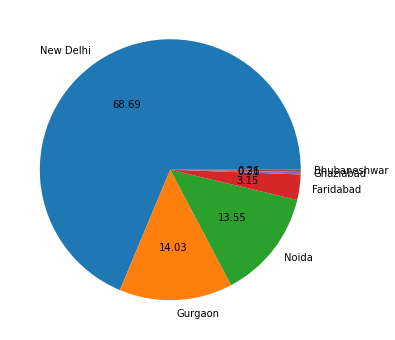

In [170]:
plt.pie(city_count[:6],labels= city_name[:6],autopct="%.2f")

#### lets find the top 10 cuisines


In [176]:
Zomato_df.Cuisines.value_counts().head(20)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Mughlai                           103
Ice Cream, Desserts                83
Ice Cream                          74
North Indian, Fast Food            74
Name: Cuisines, dtype: int64